# 느낀점 : 왜 분석, 전처리에 80%를 쓰는지 알겠다... 아 힘들어

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# plt 한국어 깨짐 방지
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 49 not upgraded.
Need to get 9,604 kB of archives.
After this operation, 29.5 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 fonts-nanum all 20170925-1 [9,604 kB]
Fetched 9,604 kB in 0s (23.6 MB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rc('font', family='NanumBarunGothic') 
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

from scipy import stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
df = pd.read_excel("/content/drive/MyDrive/프로그래밍 언어 공부 자료/인공지능/2022 데청캠/강의 자료/6일차/2022 데이터 청년 캠퍼스 6일차 과제(신규식, 한상범)/SolarPv.xlsx")

# 0. 데이터 확인

```
- 속성
Date : 날짜(정성)
Generatedpower : 발전량(정량)
AveragePM10 : 미세먼지(정량)
Averagecloud : 구름양(정량)
Hightemp : 온도(정량)
WeatherForecast : 날씨(정성)
HumidityForecast : 습도(정량)
Rain : 강수량(정량)
Sight : 시야거리(정량)
Sunlight : 일조량(정량)
```

### 0.1 데이터 탐색

```
정성에는 뭐, 정량에는 뭐가 있구나, 타겟으로 잡을 만한게 뭐가 있구나 파악
-> 여기서는 발전량, 강수량을 타겟으로 잡을 수 있겠는 걸? 타겟으로 볼 가치가 있네

+ 엑셀보기
데이터 분석 툴을 다루기 전에 그냥 엑셀을 열어서 feature의 의미와 연관성을 탐색한다.
```

### 0.2 시각화로 탐색

In [ ]:
df

,Date,Generatedpower,AveragePM10,Averagecloud,Hightemp,WeatherForecast,HumidityForecast,Rain,Sight,Sunlight
0,2017-01-26,2230.406983,62.470588,0.000000,8.6,맑음,51.000000,0.0,10.357143,13.5526
1,2017-01-27,2326.791016,44.529412,2.411765,8.1,맑음,44.571429,0.0,14.714286,13.1526
2,2017-01-28,2477.729004,38.882353,0.352941,10.8,맑음,37.000000,0.0,10.671429,13.6300
3,2017-01-29,241.446289,37.176471,7.352941,6.7,흐림,99.000000,4.0,9.385714,2.4199
4,2017-01-30,2768.182617,35.823529,2.411765,3.5,맑음,54.571429,0.0,13.371429,12.2054
...,...,...,...,...,...,...,...,...,...,...
1350,2020-10-07,2878.000000,20.176471,1.588235,23.0,맑음,40.285714,0.0,13.285714,17.6437
1351,2020-10-08,2937.250000,24.000000,0.117647,22.3,맑음,41.571429,0.0,14.000000,20.1938
1352,2020-10-09,2693.000000,25.000000,3.058824,23.0,구름,41.000000,0.0,14.457143,19.6520
1353,2020-10-10,2639.250000,19.058824,2.176471,23.3,맑음,47.285714,0.0,14.142857,17.0335


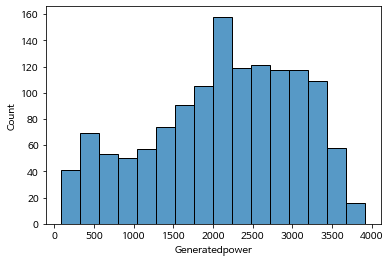

In [ ]:
sns.histplot(data = df, x = "Generatedpower")
plt.show()

### 0.3 데이터 파악 분석

### 발전량(종속변수)

```
1. 이상치 파악을 위한 카운트 결과 대부분 2000~ 3500으로 크게 이상한 점 없음 -> 원래는 가족수나 자식수처럼 확실하게 이상한 점이 들어나는 경우만 카운트를 찍어 보는 거임

2. boxplot 결과 날씨에 따른 발전량 이상 없음

3. 실제로 맑은 날에 발전량이 높은 것을 확인 가능
```

In [ ]:
 df["Generatedpower"].value_counts()

2137.6800    14
2015.2500     2
2779.2500     2
2178.7500     2
2013.5000     2
             ..
3515.0000     1
3262.8125     1
2982.0625     1
3491.1250     1
2639.2500     1
Name: Generatedpower, Length: 1325, dtype: int64

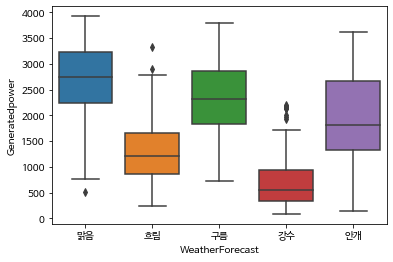

In [ ]:
# boxplot
plt.figure(figsize=(40, 5))
plt.xticks(rotation = 45)
sns.boxplot(x='WeatherForecast', y='Generatedpower', data=df)
plt.show()

In [ ]:
# groupby
df['Generatedpower'].groupby(df['WeatherForecast']).describe()

,count,mean,std,min,25%,50%,75%,max
WeatherForecast,,,,,,,,
강수,164.0,727.762562,539.454803,85.633085,336.46875,549.125000,931.328125,2200.875000
구름,401.0,2315.179329,636.469276,727.500000,1822.59250,2313.820000,2864.385000,3785.000000
맑음,530.0,2729.494624,592.193592,502.110000,2235.93750,2740.023125,3228.300781,3921.728750
안개,103.0,1909.537894,849.861615,141.250000,1334.65625,1806.500000,2660.750000,3615.639375
흐림,157.0,1306.204799,612.691522,237.942340,859.56250,1201.750000,1662.445000,3327.290000


### 독립변수

```
1. 확실한 이상치를 모르는 것이므로 카운트를 세지 않음

2. 안개가 많은 날에 미세먼지가 높은 것은 특별한 이상치로 보이지는 않음

3. 확실히 안개 낀 날에 미세먼지가 높음, -1값은 0이나 최소 값으로 대체하는 작업 필요
```

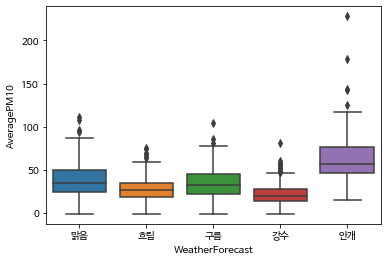

In [ ]:
# 1. 미세먼지(정량)
# boxplot
sns.boxplot(x='WeatherForecast', y='AveragePM10', data=df)

In [ ]:
# groupby
df['AveragePM10'].groupby(df['WeatherForecast']).describe()

,count,mean,std,min,25%,50%,75%,max
WeatherForecast,,,,,,,,
강수,164.0,22.796270,13.340083,-1.000000,14.338235,20.264706,27.397059,81.411765
구름,401.0,35.277101,16.420656,-1.000000,22.470588,32.470588,45.470588,104.117647
맑음,530.0,37.844839,17.997218,-1.000000,24.235294,34.676471,49.500000,111.000000
안개,103.0,64.112507,31.364843,14.823529,46.941176,57.117647,76.705882,228.058824
흐림,157.0,28.657924,14.900603,-1.000000,18.235294,26.411765,35.058824,75.411765


```
정량 데이터는 비슷한 분석 수행하므로 생략
```

In [ ]:
# 2. 구름양(정량)

In [ ]:
# 3. 온도(정량)

```
1. 명목형 변수는 개수를 세어 보는데 적당하다고 판단됨

2. boxplot에서 이상치 없음

3. 각 클래스 별로 이상치 판단

4. crosstab에서도 다른 명목변수가 있었다면 했겠지만 없으므로 불가
```

In [ ]:
# 4. 날씨(정성)
df["WeatherForecast"].value_counts()

맑음    530
구름    401
강수    164
흐림    157
안개    103
Name: WeatherForecast, dtype: int64

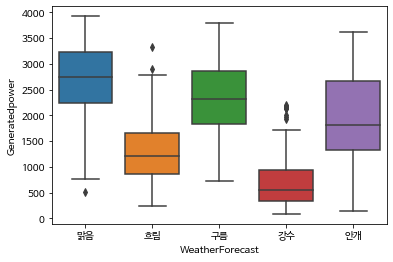

In [ ]:
# boxplot
sns.boxplot(x='WeatherForecast', y='Generatedpower', data=df)

In [ ]:
print(df[df.WeatherForecast=='맑음'].Generatedpower.describe())
print()
print(df[df.WeatherForecast=='구름'].Generatedpower.describe())
print()
print(df[df.WeatherForecast=='강수'].Generatedpower.describe())
print()
print(df[df.WeatherForecast=='흐림'].Generatedpower.describe())
print()
print(df[df.WeatherForecast=='안개'].Generatedpower.describe())

#pd.crosstab(df.Generatedpower, df.WeatherForecast)

count     530.000000
mean     2729.494624
std       592.193592
min       502.110000
25%      2235.937500
50%      2740.023125
75%      3228.300781
max      3921.728750
Name: Generatedpower, dtype: float64

count     401.000000
mean     2315.179329
std       636.469276
min       727.500000
25%      1822.592500
50%      2313.820000
75%      2864.385000
max      3785.000000
Name: Generatedpower, dtype: float64

count     164.000000
mean      727.762562
std       539.454803
min        85.633085
25%       336.468750
50%       549.125000
75%       931.328125
max      2200.875000
Name: Generatedpower, dtype: float64

count     157.000000
mean     1306.204799
std       612.691522
min       237.942340
25%       859.562500
50%      1201.750000
75%      1662.445000
max      3327.290000
Name: Generatedpower, dtype: float64

count     103.000000
mean     1909.537894
std       849.861615
min       141.250000
25%      1334.656250
50%      1806.500000
75%      2660.750000
max      3615.639375
Name: Ge

In [ ]:
# 5. 습도(정량)

In [ ]:
# 6. 강수량(정량)

In [ ]:
# 7. 시야거리(정량)

In [ ]:
# 8. 일조량(정량)

# 1. 기초 통계 분석

In [ ]:
# 정량 : 발전량, 미세먼지,구름양, 온도, 습도, 강수량, 가시거리, 일조량
# 정성 : 날짜, 날씨
# 타겟 : 발전량


df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1355 entries, 0 to 1354
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Date              1355 non-null   object 
 1   Generatedpower    1355 non-null   float64
 2   AveragePM10       1355 non-null   float64
 3   Averagecloud      1355 non-null   float64
 4   Hightemp          1355 non-null   float64
 5   WeatherForecast   1355 non-null   object 
 6   HumidityForecast  1355 non-null   float64
 7   Rain              1355 non-null   float64
 8   Sight             1355 non-null   float64
 9   Sunlight          1355 non-null   float64
dtypes: float64(8), object(2)
memory usage: 106.0+ KB


In [ ]:
!pip install dataprep
from dataprep.eda import create_report

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 9.5 MB 3.7 MB/s 
     |████████████████████████████████| 1.1 MB 41.2 MB/s 
     |████████████████████████████████| 95 kB 4.1 MB/s 
     |████████████████████████████████| 943 kB 39.7 MB/s 
     |████████████████████████████████| 435 kB 52.7 MB/s 
     |████████████████████████████████| 50 kB 6.7 MB/s 
     |████████████████████████████████| 965 kB 39.4 MB/s 
     |████████████████████████████████| 749 kB 50.6 MB/s 
     |████████████████████████████████| 1.0 MB 29.0 MB/s 
     |████████████████████████████████| 78 kB 6.4 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 133 kB 44.3 MB/s 
     |████████████████████████████████| 144 kB 42.0 MB/s 
     |████████████████████████████████| 94 kB 2.7 MB/s 
     |████████████████████████

DataPrep Report
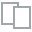
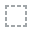
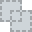
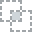
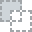
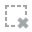
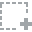
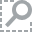
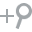
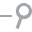
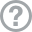
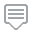
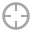
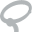
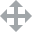
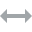
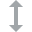
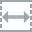
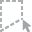
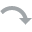
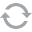
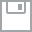
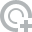
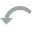
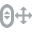
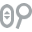
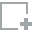
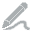
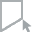
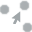
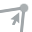
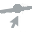

In [ ]:
create_report(df)

In [ ]:
# (별개) 리포트의 히스토그램을 보니 강수량 처리 필요
df["Rain"].value_counts()

0.00     1089
0.07       30
0.50       29
1.00       16
0.14       15
         ... 
2.40        1
1.96        1
1.56        1
8.90        1
35.50       1
Name: Rain, Length: 83, dtype: int64

### ① 평균값과 중간값 체크 


In [ ]:
df.describe()

,Generatedpower,AveragePM10,Averagecloud,Hightemp,HumidityForecast,Rain,Sight,Sunlight
count,1355.000000,1355.000000,1355.000000,1355.000000,1355.000000,1355.000000,1355.000000,1355.000000
mean,2137.364338,36.195832,2.744877,20.083822,56.449112,1.149262,13.540538,15.346293
std,927.743083,20.402214,2.753615,8.629214,19.708559,4.925520,3.403472,7.096538
min,85.633085,-1.000000,0.000000,-3.100000,13.142857,0.000000,-1.000000,0.941500
25%,1511.062500,22.000000,0.117647,13.100000,41.785714,0.000000,11.735714,10.161950
50%,2213.250000,31.705882,1.823529,21.300000,54.857143,0.000000,13.800000,15.002100
75%,2890.290000,47.588235,5.000000,27.100000,68.785714,0.000000,15.685714,21.123000
max,3921.728750,228.058824,10.000000,37.600000,99.000000,66.500000,20.000000,29.560900


### ② 평균값과 최빈값 체크

In [ ]:
df.AveragePM10.value_counts()

 21.117647    7
-1.000000     7
 16.411765    6
 30.058824    6
 24.588235    5
             ..
 24.411765    1
 44.294118    1
 78.882353    1
 55.529412    1
 20.176471    1
Name: AveragePM10, Length: 771, dtype: int64

In [ ]:
print(df.mode())

            Date  Generatedpower  AveragePM10  Averagecloud  Hightemp  \
0     2017-01-26         2137.68    -1.000000           0.0      27.7   
1     2017-01-27             NaN    21.117647           NaN       NaN   
2     2017-01-28             NaN          NaN           NaN       NaN   
3     2017-01-29             NaN          NaN           NaN       NaN   
4     2017-01-30             NaN          NaN           NaN       NaN   
...          ...             ...          ...           ...       ...   
1350  2020-10-07             NaN          NaN           NaN       NaN   
1351  2020-10-08             NaN          NaN           NaN       NaN   
1352  2020-10-09             NaN          NaN           NaN       NaN   
1353  2020-10-10             NaN          NaN           NaN       NaN   
1354  2020-10-11             NaN          NaN           NaN       NaN   

     WeatherForecast  HumidityForecast  Rain  Sight  Sunlight  
0                 맑음         47.285714   0.0   20.0    0.94

In [ ]:
# (별개) 평균값과 최빈값을 체크해보니 미세먼지 확인 필요
df["AveragePM10"].value_counts()

 21.117647    7
-1.000000     7
 16.411765    6
 30.058824    6
 24.588235    5
             ..
 24.411765    1
 44.294118    1
 78.882353    1
 55.529412    1
 20.176471    1
Name: AveragePM10, Length: 771, dtype: int64

In [ ]:
# 분산
df.var()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


Generatedpower      860707.227495
AveragePM10            416.250329
Averagecloud             7.582394
Hightemp                74.463341
HumidityForecast       388.427289
Rain                    24.260751
Sight                   11.583625
Sunlight                50.360849
dtype: float64

### ③ 왜도, 첨도 체크

In [ ]:
# 왜도
df.skew()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


Generatedpower     -0.375350
AveragePM10         1.729195
Averagecloud        0.646959
Hightemp           -0.306407
HumidityForecast    0.278179
Rain                6.584469
Sight              -1.113857
Sunlight           -0.037195
dtype: float64

In [ ]:
# 첨도
df.kurt()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  


Generatedpower      -0.758393
AveragePM10          8.503080
Averagecloud        -0.946624
Hightemp            -0.815854
HumidityForecast    -0.647957
Rain                53.937549
Sight                3.279991
Sunlight            -0.927820
dtype: float64

### ④ create_report 추가 분석

### ⑤ 피봇을 활용한 정성변수 상관계수 분석

```
결과
정성데이터인 날씨와 날짜 분석
-> 날짜 : 상반기와 하반기의 차이가 확실하므로 분기별로 구분할 필요가 있음

-> 날씨 : 다행히도 상식과 비슷하게 적용됨
맑음(구름과 안개 포함) : 높음
강수(흐림 포함) : 낮음

★ 이때 날씨의 경우 맑음 강수 안개가 좋을지 맑음, 나머지가 좋은지를 파악해야함
```

# 2. 데이터 시각화로 분석

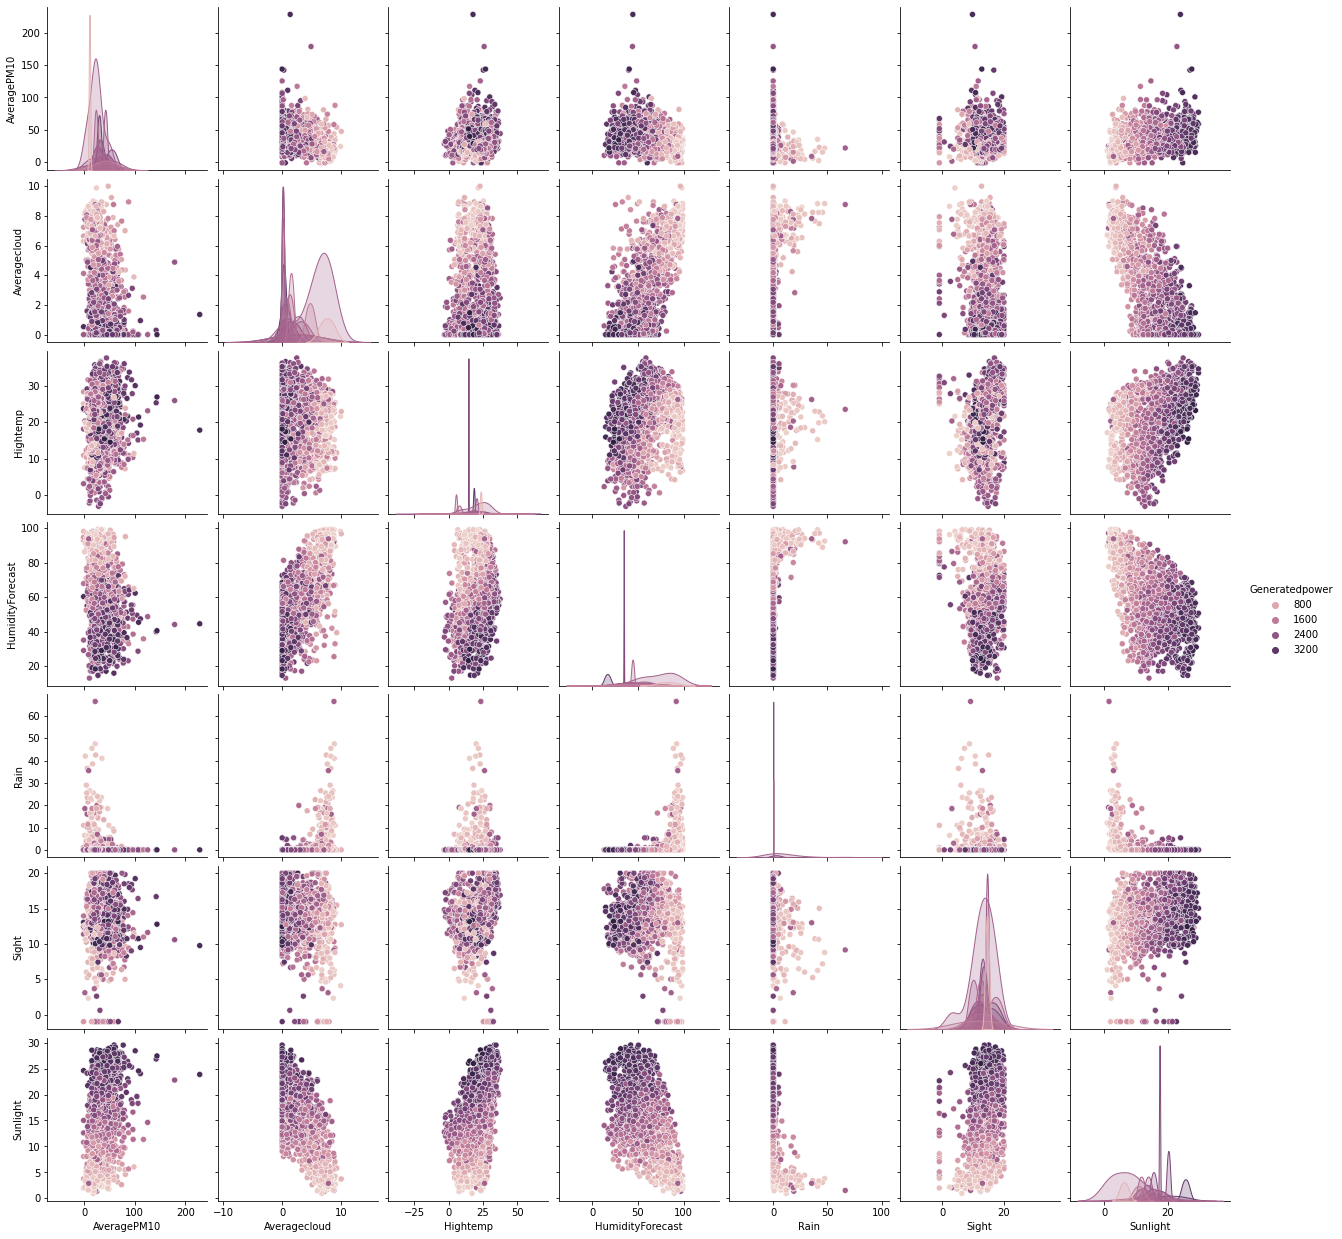

In [ ]:
sns.pairplot(data = df, hue = "Generatedpower")
plt.show()

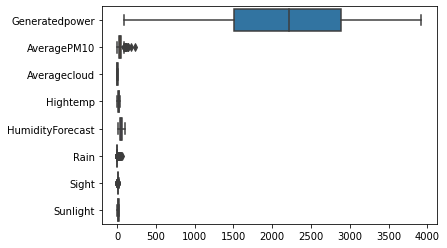

In [ ]:
sns.boxplot(data = df, orient = 'h')
plt.show()

# 3. 통계 기반 분석

```
① 정규성 검정
귀무가설 : 주어진 데이터가 정규분포를 따른다.

샤피로 테스트 결과
```

In [ ]:
# 결과 : 다 정규화를 따른다?? 흠 믿을 수 없는 결과인 듯하다.
for f_name in df.columns:
    if df[f_name].dtype != type(str):
        print("Shapiro 정규성 검정 결과 (statistic, p-value) - " + f_name)
        print("solarPV:\t", stats.shapiro(df[f_name]))
        print("\n")

Shapiro 정규성 검정 결과 (statistic, p-value) - Generatedpower
solarPV:	 ShapiroResult(statistic=0.9654256105422974, pvalue=1.8848122548382263e-17)


Shapiro 정규성 검정 결과 (statistic, p-value) - AveragePM10
solarPV:	 ShapiroResult(statistic=0.9030428528785706, pvalue=1.81641542884768e-28)


Shapiro 정규성 검정 결과 (statistic, p-value) - Averagecloud
solarPV:	 ShapiroResult(statistic=0.8661057949066162, pvalue=1.6592354023774076e-32)


Shapiro 정규성 검정 결과 (statistic, p-value) - Hightemp
solarPV:	 ShapiroResult(statistic=0.9723435640335083, pvalue=1.9170274125990348e-15)


Shapiro 정규성 검정 결과 (statistic, p-value) - HumidityForecast
solarPV:	 ShapiroResult(statistic=0.9786754250526428, pvalue=2.82807550164646e-13)


Shapiro 정규성 검정 결과 (statistic, p-value) - Rain
solarPV:	 ShapiroResult(statistic=0.24979490041732788, pvalue=0.0)


Shapiro 정규성 검정 결과 (statistic, p-value) - Sight
solarPV:	 ShapiroResult(statistic=0.9364499449729919, pvalue=1.3170769608750269e-23)


Shapiro 정규성 검정 결과 (statistic, p-value) - Sunlight

```
② 등분산 검정
귀무가설 : 두 집단이 등분산이다.

-> 분류문제가 아니라서 두 집단을 나누는게 불가능해 보인다.
```

```
③ 독립 t검정
귀무가설 : 두 집단이 차이가 없다.

-> 등분산과 같이 두 집단의 모양을 보는 것이기 때문에 불가능해 보인다.
```

```
④ 이원 카이 제곱 검정
귀무가설 : 두 변수 사이에 상관관계가 없다
```

In [ ]:
# 날짜에 따른 생존 여부 -> 날짜는 너무 다 달라서 결과 출력이 안되는 듯 하다

'''
print("\n[Generatedpower - Date]")
target = pd.crosstab(df["Generatedpower"], df["Date"]) #빈도수 : 생존자이고 pclass가 1인 사람은 몇명인지 2인, 3인은 몇명인지 cross로 빈도수 카운팅 가능
display(target)
chi2, p, dof, ex = stats.chi2_contingency(target, correction = False)
print("\nP-value = {}".format(p)) 
'''

# 미세먼지 농도에 따른 생존 여부
print("\n[Generatedpower - AveragePM10]")
target = pd.crosstab(df["Generatedpower"], df["AveragePM10"])
display(target)
chi2, p, dof, ex = stats.chi2_contingency(target, correction = False)
print("\nP-value = {}".format(p)) 

# 구름에 따른 생존 여부
print("\n[Generatedpower - Averagecloud]")
target = pd.crosstab(df["Generatedpower"], df["Averagecloud"])
display(target)
chi2, p, dof, ex = stats.chi2_contingency(target, correction = False)
print("\nP-value = {}".format(p)) 

# 온도에 따른 생존 여부
print("\n[Generatedpower - Hightemp]")
target = pd.crosstab(df["Generatedpower"], df["Hightemp"])
display(target)
chi2, p, dof, ex = stats.chi2_contingency(target, correction = False)
print("\nP-value = {}".format(p)) 

# 가시거리에 따른 생존 여부
print("\n[Generatedpower - Sight]")
target = pd.crosstab(df["Generatedpower"], df["Sight"])
display(target)
chi2, p, dof, ex = stats.chi2_contingency(target, correction = False)
print("\nP-value = {}".format(p)) 

# 날씨에 따른 생존 여부
print("\n[Generatedpower - WeatherForecast]")
target = pd.crosstab(df["Generatedpower"], df["WeatherForecast"])
display(target)
chi2, p, dof, ex = stats.chi2_contingency(target, correction = False)
print("\nP-value = {}".format(p)) 

# 습도에 따른 생존 여부
print("\n[Generatedpower - HumidityForecast]")
target = pd.crosstab(df["Generatedpower"], df["HumidityForecast"])
display(target)
chi2, p, dof, ex = stats.chi2_contingency(target, correction = False)
print("\nP-value = {}".format(p)) 

# 강수에 따른 생존 여부
print("\n[Generatedpower - Rain]")
target = pd.crosstab(df["Generatedpower"], df["Rain"])
display(target)
chi2, p, dof, ex = stats.chi2_contingency(target, correction = False)
print("\nP-value = {}".format(p)) 

# 일조량에 따른 생존 여부
print("\n[Generatedpower - Sunlight]")
target = pd.crosstab(df["Generatedpower"], df["Sunlight"])
display(target)
chi2, p, dof, ex = stats.chi2_contingency(target, correction = False)
print("\nP-value = {}".format(p)) 


[Generatedpower - AveragePM10]


AveragePM10,-1.000000,1.117647,1.529412,2.411765,4.117647,4.235294,4.411765,4.470588,4.882353,5.117647,...,104.117647,106.352941,107.470588,111.000000,117.058824,125.411765,142.117647,143.705882,178.529412,228.058824
Generatedpower,,,,,,,,,,,,,,,,,,,,,
85.633085,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
99.750000,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
111.572660,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
130.250000,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
133.000000,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3808.500000,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3820.103750,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3838.250000,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0



P-value = 0.7108566140099633

[Generatedpower - Averagecloud]


Averagecloud,0.000000,0.058824,0.117647,0.176471,0.235294,0.294118,0.352941,0.411765,0.470588,0.529412,...,8.588235,8.647059,8.705882,8.764706,8.823529,8.941176,9.000000,9.235294,9.882353,10.000000
Generatedpower,,,,,,,,,,,,,,,,,,,,,
85.633085,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
99.750000,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
111.572660,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
130.250000,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
133.000000,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3808.500000,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3820.103750,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3838.250000,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0



P-value = 0.8121225658349122

[Generatedpower - Hightemp]


Hightemp,-3.1,-2.4,-2.2,-1.9,-1.6,-1.4,-1.0,-0.7,-0.5,-0.1,...,35.2,35.3,35.4,35.7,36.0,36.2,36.3,36.4,36.6,37.6
Generatedpower,,,,,,,,,,,,,,,,,,,,,
85.633085,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
99.750000,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
111.572660,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
130.250000,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
133.000000,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3808.500000,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3820.103750,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3838.250000,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0



P-value = 0.6778719567355088

[Generatedpower - Sight]


Sight,-1.000000,0.600000,2.314286,2.600000,3.085714,3.657143,4.071429,4.614286,4.757143,4.814286,...,19.628571,19.685714,19.714286,19.785714,19.828571,19.857143,19.900000,19.957143,19.971429,20.000000
Generatedpower,,,,,,,,,,,,,,,,,,,,,
85.633085,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
99.750000,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
111.572660,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
130.250000,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
133.000000,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3808.500000,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3820.103750,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3838.250000,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0



P-value = 0.34603125654009453

[Generatedpower - WeatherForecast]


WeatherForecast,강수,구름,맑음,안개,흐림
Generatedpower,,,,,
85.633085,1,0,0,0,0
99.750000,1,0,0,0,0
111.572660,1,0,0,0,0
130.250000,1,0,0,0,0
133.000000,1,0,0,0,0
...,...,...,...,...,...
3808.500000,0,0,1,0,0
3820.103750,0,0,1,0,0
3838.250000,0,0,1,0,0



P-value = 0.49330770646067645

[Generatedpower - HumidityForecast]


HumidityForecast,13.142857,14.714286,14.857143,16.000000,17.142857,17.285714,17.428571,18.428571,18.571429,19.142857,...,96.714286,96.857143,97.000000,97.571429,97.941176,98.000000,98.285714,98.571429,98.714286,99.000000
Generatedpower,,,,,,,,,,,,,,,,,,,,,
85.633085,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
99.750000,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
111.572660,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
130.250000,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
133.000000,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3808.500000,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3820.103750,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3838.250000,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0



P-value = 0.7627938234249589

[Generatedpower - Rain]


Rain,0.00,0.07,0.10,0.14,0.20,0.21,0.28,0.30,0.40,0.50,...,29.00,35.50,36.50,38.50,41.00,42.00,42.50,45.50,47.50,66.50
Generatedpower,,,,,,,,,,,,,,,,,,,,,
85.633085,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
99.750000,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
111.572660,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
130.250000,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
133.000000,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3808.500000,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3820.103750,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3838.250000,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0



P-value = 0.9999999984267336

[Generatedpower - Sunlight]


Sunlight,0.9415,1.3500,1.4460,1.5090,1.5878,1.6033,1.7579,1.9138,1.9154,1.9423,...,28.4612,28.5558,28.5989,28.7518,28.8004,28.8367,29.0634,29.1622,29.5355,29.5609
Generatedpower,,,,,,,,,,,,,,,,,,,,,
85.633085,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
99.750000,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
111.572660,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
130.250000,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
133.000000,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3808.500000,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3820.103750,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3838.250000,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0



P-value = 0.24214811886663942


```
⑤ 분산 분석(분류만 가능한데 멀티 클래스가 되니 날씨로 해봄)
타겟이 멀티 클래스일 경우 하는 t-test

귀무가설 : 모집단 평균이 동일하다. -> t-test가 두 집단의 평균의 차이가 없는지를 나타내는 것이므로 같은 결과값을 낸다.
but 해석 방법에 차이가 있다.

-> 이건 멀티 클래스가 가능하니 날씨로 해보자
```

```
⑤-1 일원 분산 분석

결과 
너무 작은 e-230은 의심해 봐야하는 수치로 보인다
4,7 번째 열은 의미가 있어 보인다


4 : 온도에 따라 날씨에는 차이가 있다.
7 : 가시거리에 따른 날씨는 차이가 있다
```

In [ ]:
# 이거 무조건 수치형 카테고리 01234로 바꾸고 해야한다
sunny_df = df[df['WeatherForecast'] == 0].drop(['WeatherForecast'], axis = 'columns')
rainy_df = df[df['WeatherForecast'] == 1].drop(['WeatherForecast'], axis = 'columns')
sad_df = df[df['WeatherForecast'] == 2].drop(['WeatherForecast'], axis = 'columns')
foggy_df = df[df['WeatherForecast'] == 3].drop(['WeatherForecast'], axis = 'columns')
cloudy_df = df[df['WeatherForecast'] == 4].drop(['WeatherForecast'], axis = 'columns')
print(sunny_df.columns)

F_statistic, p_value = stats.f_oneway(sunny_df, rainy_df, sad_df, foggy_df, cloudy_df)
print('WeatherForecast 이용한 일원 분산분석 결과 : F={}, p={}\n\n'.format(F_statistic, p_value))

Index(['Date', 'Generatedpower', 'AveragePM10', 'Averagecloud', 'Hightemp',
       'HumidityForecast', 'Rain', 'Sight', 'Sunlight'],
      dtype='object')
WeatherForecast 이용한 일원 분산분석 결과 : F=[nan nan nan nan nan nan nan nan nan], p=[nan nan nan nan nan nan nan nan nan]




/usr/local/lib/python3.7/dist-packages/scipy/stats/stats.py:3621: F_onewayBadInputSizesWarning: at least one input has length 0
  warnings.warn(F_onewayBadInputSizesWarning('at least one input '


```
⑤-2 two way 분산 분석

결과
미세먼지, 습도, 강수량에 따라 날씨에 차이가 있다!!
```

In [ ]:
# 이것도 무조건 카테고리 01234로 바꾸고 해야한다
# 또 date는 안 되네 걍 빼고 하자
model = ols('WeatherForecast ~ Generatedpower + AveragePM10 + Averagecloud + Hightemp + HumidityForecast + Rain + Sight + Sunlight', data=df).fit()
# print(model.summary())
tway = sm.stats.anova_lm(model, typ=2)
print("\n[종속 변수 - WeatherForecast]\n", tway)


[종속 변수 - WeatherForecast]
                      sum_sq      df            F         PR(>F)
Generatedpower  4935.366118     1.0  1525.209936  5.615433e-224
AveragePM10      112.294501     1.0    34.703137   4.840304e-09
Residual        4374.882980  1352.0          NaN            NaN


```
⑥ 상관분석
귀무가설 - 두 집단의 상관성이 0이다.
대립 - 두 집단의 통계는 유의미한 상관을 갖는다.
```

                  Generatedpower  AveragePM10  Averagecloud  Hightemp  \
Generatedpower          1.000000     0.272669     -0.750288  0.248559   
AveragePM10             0.272669     1.000000     -0.305202  0.103233   
Averagecloud           -0.750288    -0.305202      1.000000  0.007060   
Hightemp                0.248559     0.103233      0.007060  1.000000   
WeatherForecast         0.075374     0.169515     -0.113105 -0.049385   
HumidityForecast       -0.608985    -0.206983      0.697684  0.330711   
Rain                   -0.350551    -0.183914      0.380808  0.026661   
Sight                   0.179501    -0.096862     -0.076777  0.297109   
Sunlight                0.901112     0.311573     -0.692091  0.454349   

                  WeatherForecast  HumidityForecast      Rain     Sight  \
Generatedpower           0.075374         -0.608985 -0.350551  0.179501   
AveragePM10              0.169515         -0.206983 -0.183914 -0.096862   
Averagecloud            -0.113105          0

,Generatedpower,AveragePM10,Averagecloud,Hightemp,WeatherForecast,HumidityForecast,Rain,Sight,Sunlight
Generatedpower,1.000000,0.272669,-0.750288,0.248559,0.075374,-0.608985,-0.350551,0.179501,0.901112
AveragePM10,0.272669,1.000000,-0.305202,0.103233,0.169515,-0.206983,-0.183914,-0.096862,0.311573
Averagecloud,-0.750288,-0.305202,1.000000,0.007060,-0.113105,0.697684,0.380808,-0.076777,-0.692091
Hightemp,0.248559,0.103233,0.007060,1.000000,-0.049385,0.330711,0.026661,0.297109,0.454349
WeatherForecast,0.075374,0.169515,-0.113105,-0.049385,1.000000,-0.197446,-0.291127,0.046335,0.079940
HumidityForecast,-0.608985,-0.206983,0.697684,0.330711,-0.197446,1.000000,0.401421,-0.021235,-0.503417
Rain,-0.350551,-0.183914,0.380808,0.026661,-0.291127,0.401421,1.000000,-0.150357,-0.354569
Sight,0.179501,-0.096862,-0.076777,0.297109,0.046335,-0.021235,-0.150357,1.000000,0.256927
Sunlight,0.901112,0.311573,-0.692091,0.454349,0.079940,-0.503417,-0.354569,0.256927,1.000000


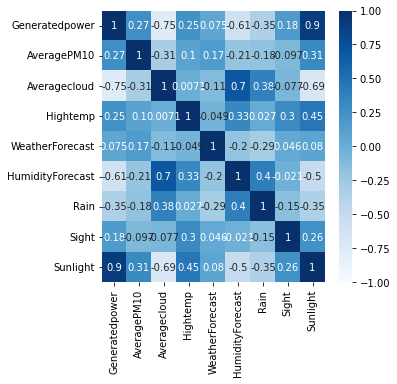

In [ ]:
corr_result = df.corr(method='pearson')
print(corr_result)

# Colab에서 DataFrame을 iPython 스타일로 출력
%load_ext google.colab.data_table
from IPython.display import HTML, display
display(corr_result)

import seaborn as sb
plt.rcParams["figure.figsize"] = (5,5)
sb.heatmap(corr_result,
           annot = True,   # 실제 값 출력
           cmap = 'Blues',  # 히트맵 색상
           vmin = -1, vmax = 1)   # 색상표 값 범위 -1 ~ +1

### 상관도 분석

```
이것도 날씨으로 해보려고 했는데 굳이 할 필요 없을 거 같다
-> 클래스가 2개 일 때 이 변수가 클래스를 나누는데 영향력을 가지니? 라는 건데 날씨를 나누는데 좋니?를 말하는 거지 -> 나중에 분류문제에서는 꼭 해보자

"4일차 통계 기반 분석을 보자"
```

# 다변량 분석

In [ ]:
# 나중에 하자

In [ ]:
##이거 전에 kt보기

# 2. 전처리 전 후 비교